# Data segmentation and segmentation assessment with Python

After reducing the dimensionality of the dataset, it is now possible to actually segment it using machine learning algorithms. As, requested in Udacity class, three algorithms will be used and their resulting segmentation will be assessed using both **Rand index** and **Calinski-Harabasz index**.
The three algorithms used are successively:
* k-Means (scikit learn implementation will be used)
* k-Medians (using pyclustering package)
* neural gas, or actually, growing neural gas will be used from MDP, Modular Toolkit for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

datafile = "climate-data-pca.csv"

climate = pd.read_csv(os.path.join(".", datafile))

In [3]:
climate.head(5)

,StoreID,City,State,Date Last Winter Freeze,Date First Winter Freeze,Growing Season Length,Elevation,Longitude,Latitude,LastWinterFreezeDiff,...,Temp 2,Precip 1,Precip 2,Precip 3,Snow 1,Snow 2,Snow 3,Rain 1,Rain 2,Rain 3
0,3772.0,Florida City,FL,2009-02-02,2010-01-14,361.0,6.29,-80.649351,25.360858,-80.0,...,1.833726,1.900455,-3.939185,0.874637,-15.149019,-0.579009,-0.776643,2.516979,-3.249076,1.318963
1,3785.0,Miami,FL,2009-01-18,2010-02-03,362.0,6.56,-80.311200,25.736641,-95.0,...,1.550907,2.322156,-5.423938,1.195367,-15.149019,-0.579009,-0.776643,2.888469,-4.597341,1.979157
2,3770.0,Miami Gardens,FL,2009-01-28,2010-01-13,365.0,6.79,-80.245486,25.949315,-85.0,...,1.465376,1.725209,-4.216764,1.258284,-15.149019,-0.579009,-0.776643,2.264950,-3.421322,1.891049
3,3762.0,Hallandale Beach,FL,2009-01-26,2010-01-13,365.0,4.59,-80.148327,25.985698,-87.0,...,1.749091,0.708201,-2.435387,1.428741,-15.149019,-0.579009,-0.776643,1.214714,-1.683193,1.829852
4,3725.0,Port Isabel,TX,2009-02-07,2009-12-28,363.0,8.50,-97.303707,26.025517,-75.0,...,0.725158,-2.123225,-1.263827,0.849837,-15.103095,-0.545498,-0.824981,-1.565505,-0.670323,1.057575


In [4]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 22 columns):
StoreID                     2126 non-null float64
City                        2126 non-null object
State                       2126 non-null object
Date Last Winter Freeze     2126 non-null object
Date First Winter Freeze    2126 non-null object
Growing Season Length       2126 non-null float64
Elevation                   2126 non-null float64
Longitude                   2126 non-null float64
Latitude                    2126 non-null float64
LastWinterFreezeDiff        2126 non-null float64
FirstWinterFreezeDiff       2126 non-null float64
Temp 1                      2126 non-null float64
Temp 2                      2126 non-null float64
Precip 1                    2126 non-null float64
Precip 2                    2126 non-null float64
Precip 3                    2126 non-null float64
Snow 1                      2126 non-null float64
Snow 2                      2126 non-null float

PCA dimensionality reduced variables are seen as "Temp X", "Precip X"... This transformation allowed us to reduce the dimensionality of the dataset by 37 fields.

In [15]:
# Need a little bit of preparation to use sklearn
selected_columns = ["StoreID", "City", "State", "Date Last Winter Freeze", "Date First Winter Freeze",
                    "Longitude", "Latitude"]

X = climate.drop(selected_columns, axis=1)

In [17]:
X = X.dropna(axis=0)

## k-Means clustering and evaluating segmentations

In [5]:
from sklearn.cluster import KMeans

In [18]:
km_clf = KMeans(n_clusters=6, n_init=5)
km_clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
km_ref = KMeans(n_clusters=1, n_init=5)
km_ref.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
from sklearn.metrics import adjusted_rand_score

In [27]:
rand_score = adjusted_rand_score(km_clf.labels_, km_clf.labels_)

print("Rand Index (Relative to 1 cluster partition) = {0}".format(rand_score))

Rand Index (Relative to 1 cluster partition) = 1.0


In [25]:
km_ref.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [26]:
km_clf.labels_

array([0, 0, 0, ..., 3, 3, 0], dtype=int32)

In [42]:
km = KMeans(n_clusters=6)

labels = list()
for i in range(5):
    labels.append(km.fit(X).labels_)

In [43]:
labels

[array([2, 2, 2, ..., 4, 4, 2], dtype=int32),
 array([3, 3, 3, ..., 2, 2, 3], dtype=int32),
 array([0, 0, 0, ..., 4, 4, 0], dtype=int32),
 array([2, 2, 2, ..., 5, 5, 2], dtype=int32),
 array([2, 2, 2, ..., 3, 3, 2], dtype=int32)]

In [46]:
for idx, seg in enumerate(labels):
    for seg2 in labels[idx+1:]:
        print(adjusted_rand_score(seg, seg2))

0.998338818685
1.0
1.0
1.0
0.998338818685
0.998338818685
0.998338818685
1.0
1.0
1.0


In [49]:
def sample_labels(model, data, num_rep):
    labels = list()
    for idx in range(num_rep):
        labels.append(model.fit(data).labels_)
    
    return labels


In [50]:
km = KMeans(n_clusters=6)

labels = sample_labels(km, X, num_rep=10)

In [51]:
labels

[array([3, 3, 3, ..., 1, 1, 3], dtype=int32),
 array([4, 4, 4, ..., 2, 2, 4], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 1], dtype=int32),
 array([3, 3, 3, ..., 1, 1, 3], dtype=int32),
 array([3, 3, 3, ..., 2, 2, 3], dtype=int32),
 array([0, 0, 0, ..., 3, 3, 0], dtype=int32),
 array([4, 4, 4, ..., 5, 5, 4], dtype=int32),
 array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
 array([4, 4, 4, ..., 2, 2, 4], dtype=int32),
 array([0, 0, 0, ..., 2, 2, 0], dtype=int32)]

In [52]:
def pairs_of_models_rand_indices(model, data, num_rep=10):
    
    labels = sample_labels(model, data, num_rep)
    scores = list()
    for idx, seg in enumerate(labels):
        for seg2 in labels[idx+1:]:
            scores.append(adjusted_rand_score(seg, seg2))
    return np.array(scores)


In [53]:
rand_scores = pairs_of_models_rand_indices(km, X, num_rep=20)

In [54]:
rand_scores

array([ 1.        ,  1.        ,  1.        ,  1.        ,  0.98460504,
        1.        ,  1.        ,  0.98460504,  0.98460504,  1.        ,
        1.        ,  0.98460504,  0.99171329,  1.        ,  0.99171329,
        0.99833882,  1.        ,  0.98460504,  1.        ,  1.        ,
        1.        ,  1.        ,  0.98460504,  1.        ,  1.        ,
        0.98460504,  0.98460504,  1.        ,  1.        ,  0.98460504,
        0.99171329,  1.        ,  0.99171329,  0.99833882,  1.        ,
        0.98460504,  1.        ,  1.        ,  1.        ,  0.98460504,
        1.        ,  1.        ,  0.98460504,  0.98460504,  1.        ,
        1.        ,  0.98460504,  0.99171329,  1.        ,  0.99171329,
        0.99833882,  1.        ,  0.98460504,  1.        ,  1.        ,
        0.98460504,  1.        ,  1.        ,  0.98460504,  0.98460504,
        1.        ,  1.        ,  0.98460504,  0.99171329,  1.        ,
        0.99171329,  0.99833882,  1.        ,  0.98460504,  1.  

{'boxes': [<matplotlib.lines.Line2D at 0x7fac120e2dd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fac120f3c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fac12107f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fac12107950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fac120e2f50>,
  <matplotlib.lines.Line2D at 0x7fac120f3650>]}

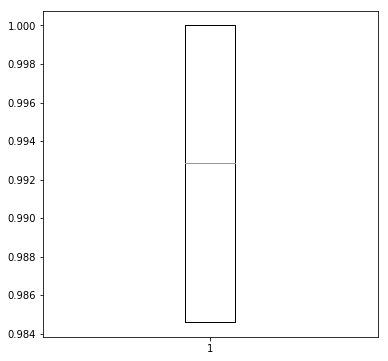

In [56]:
fig = plt.figure(figsize=(6,6))
plt.boxplot(rand_scores)

{'boxes': [<matplotlib.lines.Line2D at 0x7fac12041790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fac1204f650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fac11fd8950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fac11fd8310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fac149d3050>,
  <matplotlib.lines.Line2D at 0x7fac12041fd0>]}

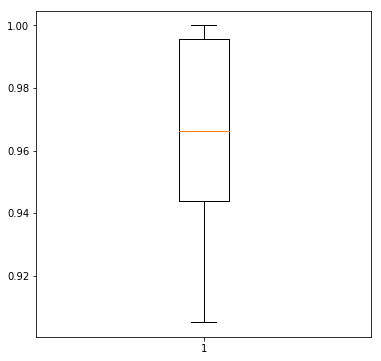

In [57]:
km = KMeans(n_clusters=10)

rand_scores = pairs_of_models_rand_indices(km, X, num_rep=20)
fig = plt.figure(figsize=(6,6))
plt.boxplot(rand_scores)

In [62]:
from sklearn.metrics import calinski_harabaz_score

def segmentation_evaluation(model, data, num_rep=10):
    
    labels = sample_labels(model, data, num_rep)
    ch_scores = list()
    rand_scores = list()
    for idx, seg in enumerate(labels):
        ch_scores.append(calinski_harabaz_score(data, seg))
        for seg2 in labels[idx+1:]:
            rand_scores.append(adjusted_rand_score(seg, seg2))
    return np.array(rand_scores), np.array(ch_scores)

In [76]:
from sklearn.preprocessing import scale

scale_X = scale(X)
km = KMeans(n_clusters=10)

rand_scores, ch_scores = segmentation_evaluation(km, scale_X, num_rep=20)

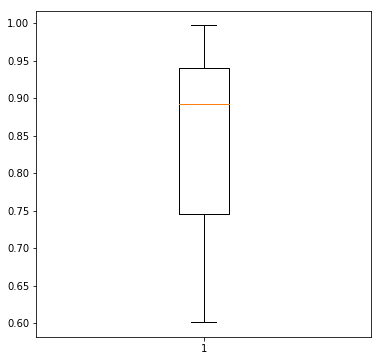

In [77]:
fig = plt.figure(figsize=(6,6))
plt.boxplot(rand_scores);

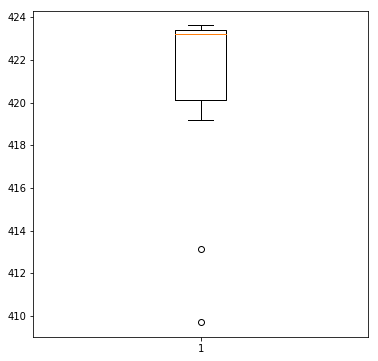

In [78]:
fig = plt.figure(figsize=(6,6))
plt.boxplot(ch_scores);

In [82]:
min_num_clusters, max_num_clusters = 6, 12
all_rand_scores = list()
all_ch_scores = list()

for num_clusters in range(min_num_clusters, max_num_clusters + 1):
    km = KMeans(n_clusters=num_clusters, n_init=10)
    rand_scores, ch_scores = segmentation_evaluation(km, scale_X, num_rep=20)
    all_rand_scores.append(rand_scores)
    all_ch_scores.append(ch_scores)

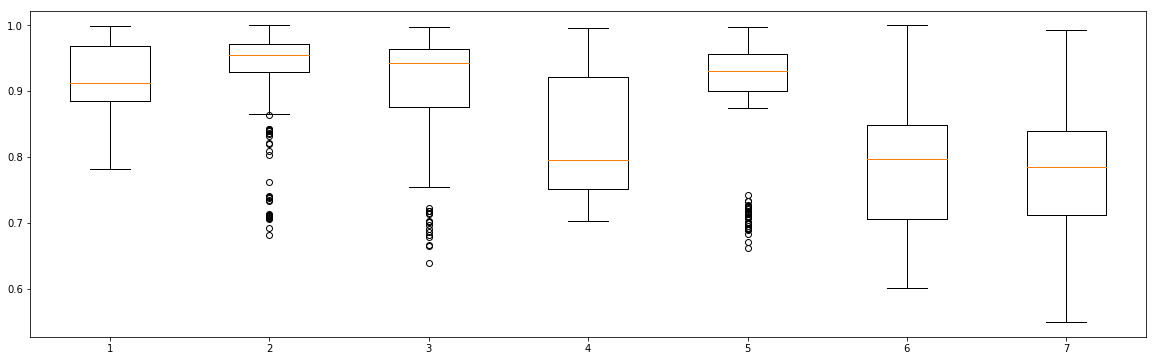

In [83]:
fig = plt.figure(figsize=(20,6))
plt.boxplot(all_rand_scores);

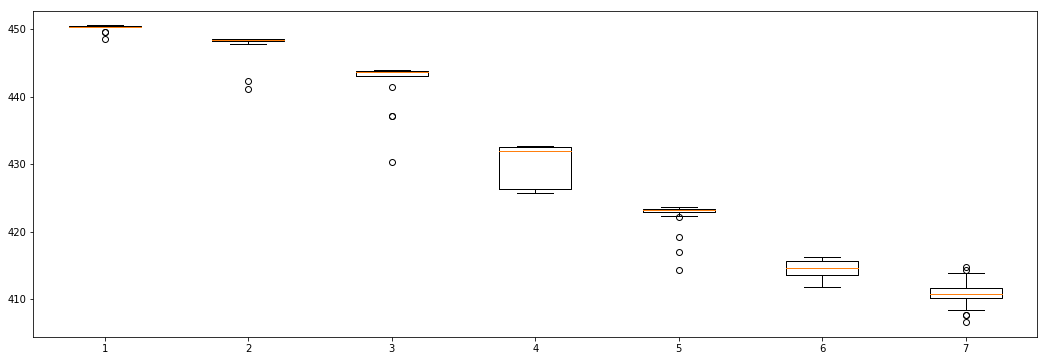

In [84]:
fig = plt.figure(figsize=(18,6))
plt.boxplot(all_ch_scores);